# Zomato Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Zomato data .csv')

In [5]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [7]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [8]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

### convert the data type of column- rate

In [9]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

df['rate'] = df['rate'].apply(handleRate)

In [10]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


### What type of restaurant do the majority of customers order from?

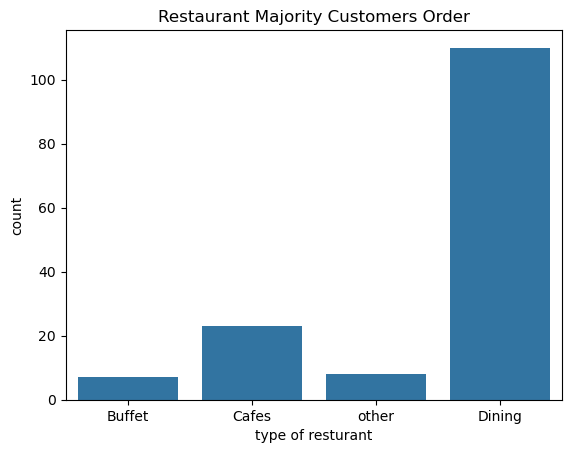

In [12]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("type of resturant")
plt.title("Restaurant Majority Customers Order")
plt.show()

### How many votes has each types of restaurant received from customers?

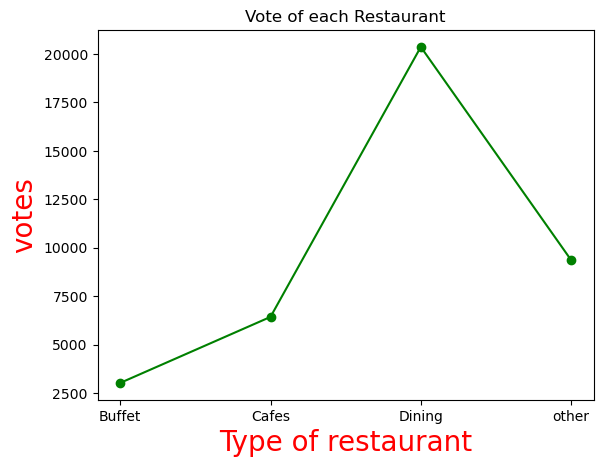

In [14]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c = "green", marker = "o")
plt.xlabel("Type of restaurant", c = 'red', size=20)
plt.ylabel("votes", c= "red", size=20)
plt.title("Vote of each Restaurant")
plt.show()

### What are the ratings that the majority of restaurants have received?

Text(0.5, 1.0, 'Rating Distribution')

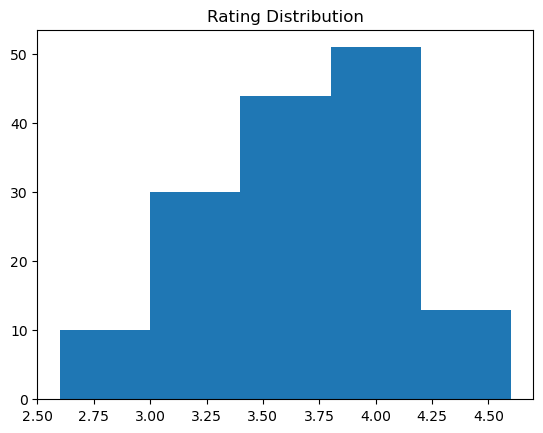

In [15]:
plt.hist(df['rate'],bins = 5)
plt.title("Rating Distribution")

### Zomato has observed that most couples order most of their food online. what is their average spending on each orders?

In [16]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


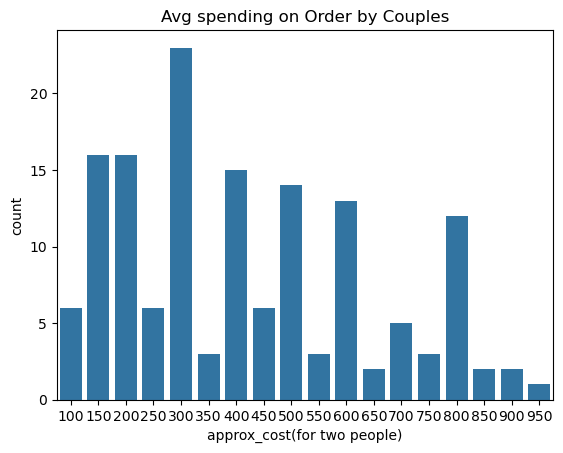

In [17]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.title("Avg spending on Order by Couples")
plt.show()

### Which mode(online or offline) has received the maximum rating?

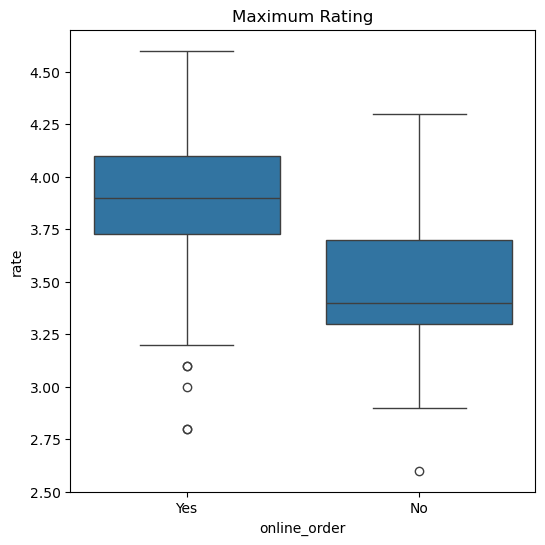

In [20]:
plt.figure(figsize = (6,6))
sns.boxplot(x = "online_order", y = "rate", data = df)
plt.title('Maximum Rating')
plt.show()

### What type of Restaurant received more offline orders,so that zomato can provide customers with some good offers?

In [21]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


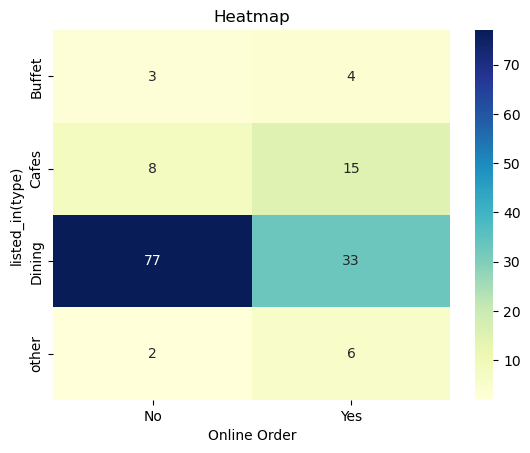

In [27]:
pivot_table = df.pivot_table(index = 'listed_in(type)', columns = 'online_order', aggfunc = 'size', fill_value = 0)
sns.heatmap(pivot_table, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("listed_in(type)")
plt.show()

Project Objective
The notebook performs an Exploratory Data Analysis (EDA) on a Zomato dataset to understand restaurant trends, customer preferences, and pricing in the food industry.

Key Steps & Analysis
Data Cleaning: * The notebook loads a dataset with 148 entries and 7 columns (name, online_order, book_table, rate, votes, approx_cost, and type).

It cleans the rate column by removing the "/5" string and converting it into a float for numerical analysis.

Descriptive Statistics: * It identifies that there are no missing values in the dataset.

The average cost for two people is approximately 418 units, with costs ranging from 100 to 950.

Visualizations & Insights:

Restaurant Types: It analyzes which types of restaurants (e.g., Buffet, Dining, Cafes) are most popular among customers.

Service Features: The code explores the distribution of restaurants that offer online ordering versus those that allow table bookings.

Correlation: It uses heatmaps to show the relationship between restaurant types and online ordering trends.

Conclusion
The analysis focuses on identifying the "majority" behavior—such as the most common restaurant types and how features like online ordering impact a restaurant's presence in the Zomato listings.